In [2]:
# %matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("athletes.csv")
df

,id,nationality,sex,date_of_birth,height,weight,sport,gold,silver,bronze
0,736041664,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11533,265605954,CUB,female,1995-08-10,1.64,58.0,athletics,0,0,0
11534,214461847,CZE,female,1986-12-19,1.73,63.0,athletics,0,0,0
11535,88361042,CHN,male,1991-05-14,1.85,100.0,wrestling,0,0,0
11536,900065925,VIE,male,1989-04-05,1.60,56.0,weightlifting,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11538 non-null  int64  
 1   nationality    11538 non-null  object 
 2   sex            11538 non-null  object 
 3   date_of_birth  11538 non-null  object 
 4   height         11208 non-null  float64
 5   weight         10879 non-null  float64
 6   sport          11538 non-null  object 
 7   gold           11538 non-null  int64  
 8   silver         11538 non-null  int64  
 9   bronze         11538 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 901.5+ KB


<IPython.core.display.Javascript object>


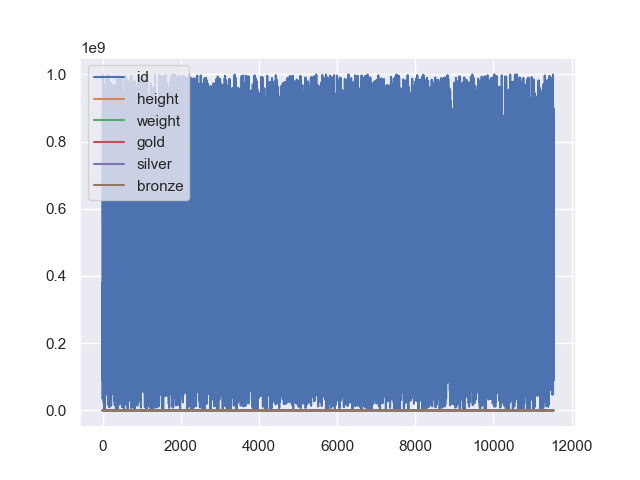

In [5]:
ax = df.plot()

<IPython.core.display.Javascript object>


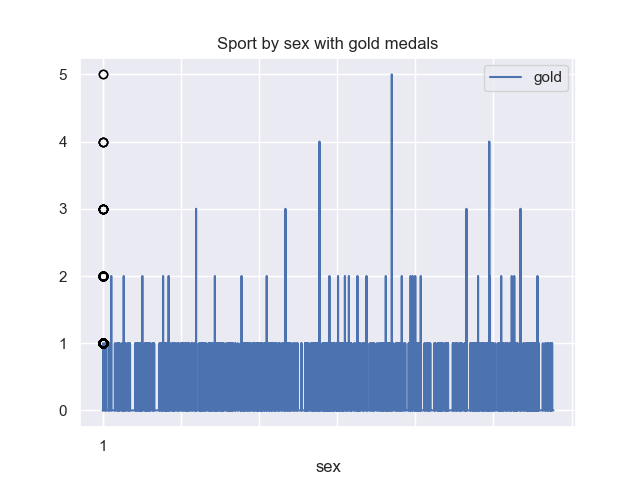

In [6]:
ax = df.plot(title="Sport by sex with gold medals", x='sex', y='gold')

In [ ]:
medal_nationalities = df['nationality'].value_counts()
medal_nationalities

In [ ]:
top_nationalities = medal_nationalities[:10]

In [ ]:
ax = top_nationalities.plot.bar(title="Top nationalities for medal winners")

In [ ]:
top = df.groupby('nationality')[['gold', 'silver', 'bronze']]\
    .sum().sort_values('gold', ascending=False)\
    .head(10)
top

## Pyplot

In [ ]:
fig, ax = plt.subplots()
top.plot.bar(color=['gold', 'silver', 'darkgoldenrod'], ax=ax, stacked=True)
fig.tight_layout()

In [14]:
df['sport'].value_counts()

athletics            2363
aquatics             1445
football              611
rowing                547
cycling               525
hockey                432
judo                  392
shooting              390
volleyball            384
sailing               380
handball              363
wrestling             353
canoe                 331
gymnastics            324
rugby sevens          300
basketball            288
boxing                286
weightlifting         258
fencing               246
equestrian            222
tennis                196
badminton             172
table tennis          172
archery               128
taekwondo             128
golf                  120
triathlon             110
modern pentathlon      72
Name: sport, dtype: int64

In [ ]:
f = df[df['sex'] == 'female']
m = df[df['sex'] == 'male']

tennis_f = f[f['sport'] == 'tennis']
tennis_m = m[m['sport'] == 'tennis']

golf_f = f[f['sport'] == 'golf']
golf_m = m[m['sport'] == 'golf']

In [ ]:
fig, ax = plt.subplots()
plots = [(tennis_f, 'red', 'Tennis, women'),
        (tennis_m, 'blue', 'Tennis, men'),
        (golf_f, 'orange', 'Golf, women'),
        (golf_m, 'green', 'Golf, men')]
for df, color, label  in plots:
    df.plot.scatter(ax=ax, x='weight', y='height', alpha=.25, color=color, label=label)

ax.set_xlabel('Weight (kg)')
ax.set_ylabel('Height (m)')
ax.set_title('Heights and Weights of Olympic Athletes')

In [ ]:
fig, ax = plt.subplots()
golf_m.plot.scatter(ax=ax, x='height', y='weight', c='gold', colormap='plasma')
fig.tight_layout()

## Seaborn

In [15]:
athletes = pd.read_csv("athletes.csv")
athletes = athletes[athletes['sport'].isin(['golf', 'tennis', 'badminton', 'archery' ])]

<IPython.core.display.Javascript object>


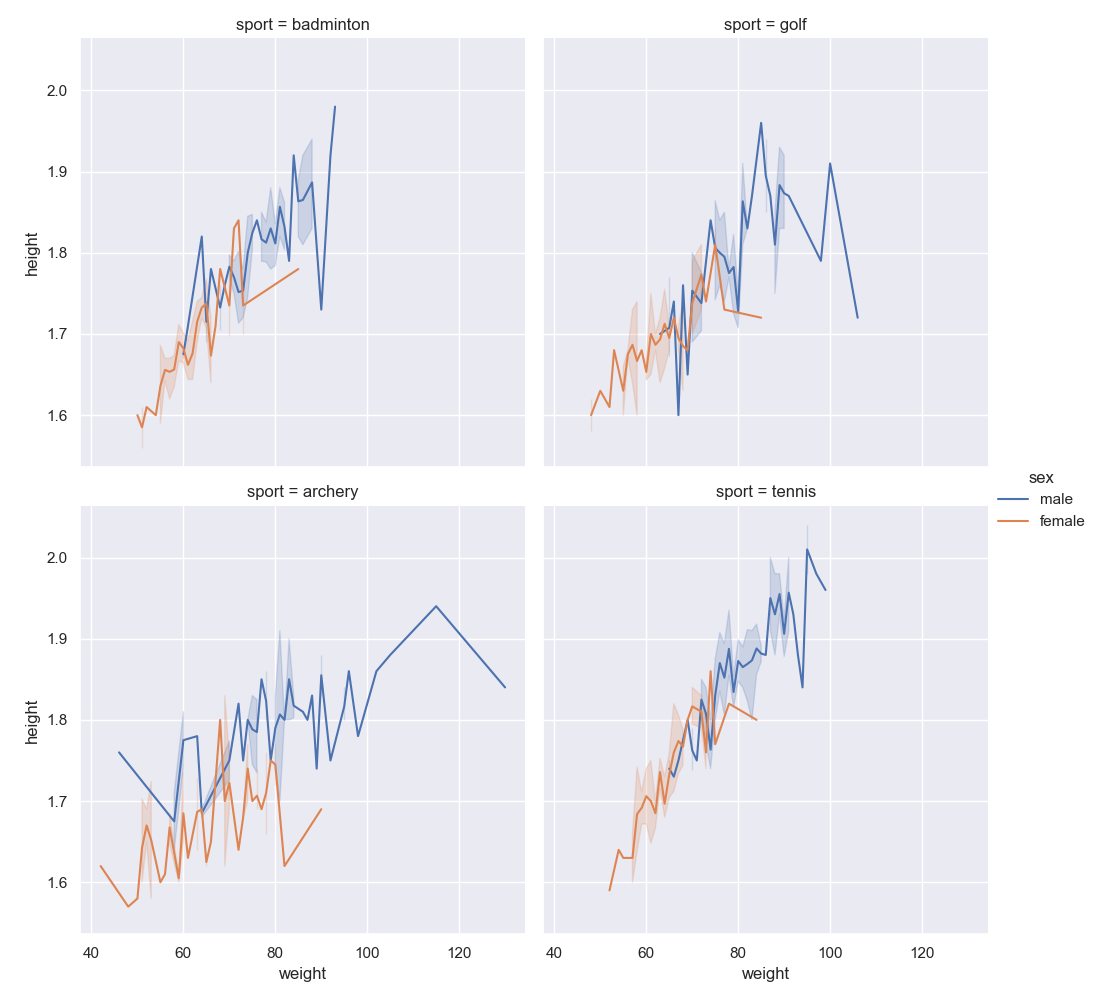

In [16]:
sns.relplot(data=athletes, x='weight', y='height', col='sport', col_wrap=2, hue='sex',
           kind='line')

<IPython.core.display.Javascript object>


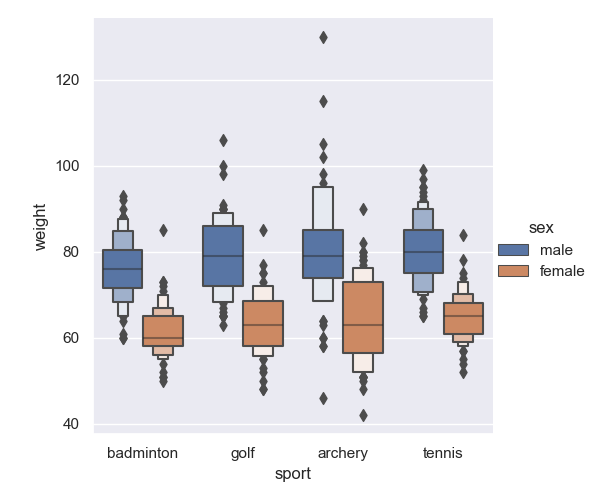

In [17]:
sns.catplot(data=athletes, x='sport', y='weight', hue='sex', kind='boxen');

In [18]:
df.columns

Index(['id', 'nationality', 'sex', 'date_of_birth', 'height', 'weight',
       'sport', 'gold', 'silver', 'bronze'],
      dtype='object')

In [25]:
df['sport'].value_counts()

athletics            2363
aquatics             1445
football              611
rowing                547
cycling               525
hockey                432
judo                  392
shooting              390
volleyball            384
sailing               380
handball              363
wrestling             353
canoe                 331
gymnastics            324
rugby sevens          300
basketball            288
boxing                286
weightlifting         258
fencing               246
equestrian            222
tennis                196
badminton             172
table tennis          172
archery               128
taekwondo             128
golf                  120
triathlon             110
modern pentathlon      72
Name: sport, dtype: int64

In [32]:
golfdf = df[df['sport'] == 'golf']
golfdf = golfdf.drop(['id', 'nationality', 'date_of_birth', 'sport'], axis=1)
golfdf

,sex,height,weight,gold,silver,bronze
109,male,1.70,79.0,0,0,0
110,female,1.73,57.0,0,0,0
262,female,1.74,58.0,0,0,0
291,female,1.58,48.0,0,0,0
332,female,1.68,69.0,0,0,0
...,...,...,...,...,...,...
10693,female,1.66,55.0,0,0,0
10822,female,1.62,48.0,0,0,0
10976,male,1.74,77.0,0,0,0
11097,female,1.71,65.0,0,0,0


In [43]:
medalspersex = golfdf.groupby('sex')['gold','silver', 'bronze'].sum()
medalspersex

C:\Users\molly\AppData\Local\Temp\ipykernel_20532\1192984960.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  medalspersex = golfdf.groupby('sex')['gold','silver', 'bronze'].sum()


,gold,silver,bronze
sex,,,
female,1,0,1
male,1,2,1


<IPython.core.display.Javascript object>


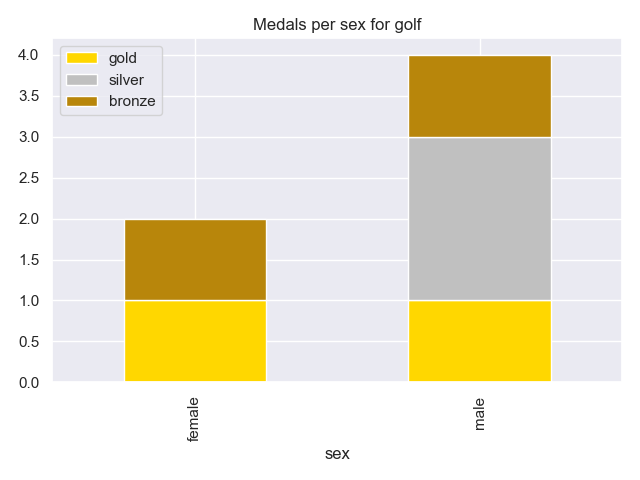

In [47]:
fig, ax = plt.subplots()
medalspersex.plot.bar(color=['gold', 'silver', 'darkgoldenrod'], ax=ax, stacked=True)
plt.title('Medals per sex for golf')
fig.tight_layout()